In [1]:
import nltk
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('text.csv')

In [6]:
df.head()

,Unnamed: 0,Text
0,0,Not Verified | Our A380 developed a fault taxi...
1,1,Not Verified | Horrible airline. Does not care...
2,2,✅ Trip Verified | My family and I have flown m...
3,3,✅ Trip Verified | This has been by far the wor...
4,4,✅ Trip Verified | In Nov 2022 I booked and pai...


In [7]:
df.columns

Index(['Unnamed: 0', 'Text'], dtype='object')

In [8]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
df.head()

,Text
0,Not Verified | Our A380 developed a fault taxi...
1,Not Verified | Horrible airline. Does not care...
2,✅ Trip Verified | My family and I have flown m...
3,✅ Trip Verified | This has been by far the wor...
4,✅ Trip Verified | In Nov 2022 I booked and pai...


In [10]:
def split_text(text):
  text=text.split('|')
  if text[0] not in ['Not Verified ','✅ Trip Verified ','❎ Unverified ','❎ Not Verified ']:
    return 'Unkwon'
  else:
    return text[0]


In [11]:
df['verification']=df['Text'].apply(split_text)


In [12]:
df['verification']=df['verification'].str.strip('✅')
df['verification']=df['verification'].str.strip('❎')

In [13]:
df['verification'].value_counts()

Unkwon             2294
 Trip Verified     1078
Not Verified        203
 Unverified          20
 Not Verified         5
Name: verification, dtype: int64

In [14]:
texts=[]
def get_text(text):
  text=text.split('|')
  if text[0] not in ['Not Verified ','✅ Trip Verified ','❎ Unverified ','❎ Not Verified ']:
     return text[0]
  else:
     return text[1]


In [15]:
df['texts']=df['Text'].apply(get_text)

In [16]:
df.isna().sum()

Text            0
verification    0
texts           0
dtype: int64

In [17]:
df.drop('Text',axis=1,inplace=True)

In [18]:
df.head()

,verification,texts
0,Not Verified,Our A380 developed a fault taxiing to the run...
1,Not Verified,Horrible airline. Does not care about their c...
2,Trip Verified,My family and I have flown mostly on British ...
3,Trip Verified,This has been by far the worst service I have...
4,Trip Verified,In Nov 2022 I booked and paid for a return jo...


#Lets Start

In [19]:
fd=df#just or fun

In [20]:
fd.head()

,verification,texts
0,Not Verified,Our A380 developed a fault taxiing to the run...
1,Not Verified,Horrible airline. Does not care about their c...
2,Trip Verified,My family and I have flown mostly on British ...
3,Trip Verified,This has been by far the worst service I have...
4,Trip Verified,In Nov 2022 I booked and paid for a return jo...


#Now preprocessing the texts using NLP

In [21]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
List=stopwords.words('english')

In [23]:
# removing stop word
def preprocess(text):
  temp=[]
  text=text.lower()
  text=text.split()
  for word in text:
    if word not in List:
      temp.append(word)
    else:
      temp.append('')
  return ' '.join(temp)



In [24]:
fd['Text']=fd['texts'].apply(preprocess)

In [25]:
import re

In [26]:
def remove_numbers_and_special(text):
    # Remove numbers and special symbols (anything that is not a letter or whitespace)
    return re.sub(r'[^A-Za-z\s]', '', text)


In [27]:
fd['Text']=fd['Text'].apply(remove_numbers_and_special)

In [28]:
fd.head()

,verification,texts,Text
0,Not Verified,Our A380 developed a fault taxiing to the run...,a developed fault taxiing runway returne...
1,Not Verified,Horrible airline. Does not care about their c...,horrible airline care customers used dec...
2,Trip Verified,My family and I have flown mostly on British ...,family flown mostly british airways las...
3,Trip Verified,This has been by far the worst service I have...,far worst service plane obvious ...
4,Trip Verified,In Nov 2022 I booked and paid for a return jo...,nov booked paid return journey new zeal...


#Get visualization top words

In [29]:
from wordcloud import WordCloud
wc=WordCloud(max_words=2000)

In [30]:
top_words=wc.generate(fd['Text'].str.cat(sep=' '))

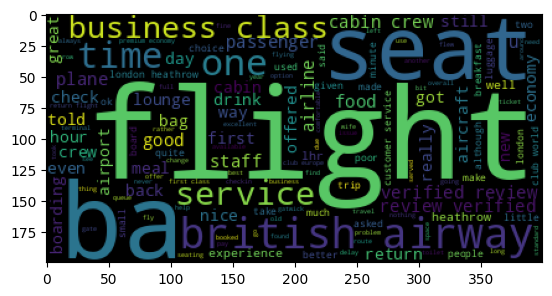

<Figure size 2000x2000 with 0 Axes>

In [31]:
plt.imshow(top_words)
plt.figure(figsize=(20,20))
plt.show()

In [32]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [33]:
def stemming(text):
  temp=[]
  text=text.split()
  for word in text:
    temp.append(ps.stem(word))
  return ' '.join(temp)




In [34]:
fd['Text']=fd['Text'].apply(stemming)

In [35]:
x=fd.iloc[:,-1].values

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(max_features=1000)
x=vectorizer.fit_transform(x).toarray()

In [37]:
x[0]#String Vectoriation

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.13381359, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.06453745,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.11912105, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.11677656, 0.        , 0.08519317, 0.        ,
       0.12293765, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.13020888, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

#Using Clustering to diiference them into positive and negative

In [38]:
from sklearn.cluster import KMeans
wccs=[]
for i in range(0,10):
  Kmeans=KMeans(n_clusters=i+1,init='k-means++',random_state=42)
  Kmeans.fit(x)
  wccs.append(Kmeans.inertia_)
wccs


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[3235.9935987665663,
 2580.219590248771,
 2548.905044659913,
 2528.8819589760433,
 2515.9767587990277,
 2505.195936781779,
 2495.920887214721,
 2486.75915335849,
 2479.8729394436596,
 2472.5159831266046]

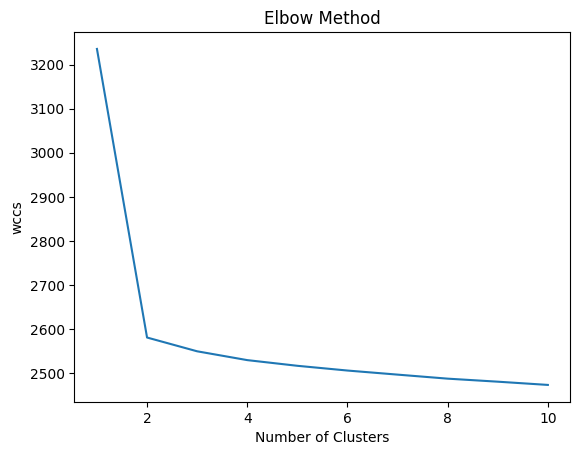

In [39]:
plt.plot(range(1,11),wccs)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wccs')
plt.show()

#We can see small edge at 2 hence we would go with 2 cluster i.e positive and negative

In [40]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
fd['Cluster_labels']=y_kmeans

In [44]:
df['Cluster_labels'].value_counts()

0    2830
1     770
Name: Cluster_labels, dtype: int64

In [42]:
fd.head()

,verification,texts,Text,Cluster_labels
0,Not Verified,Our A380 developed a fault taxiing to the run...,a develop fault taxi runway return gate flight...,0
1,Not Verified,Horrible airline. Does not care about their c...,horribl airlin care custom use decent sinc rea...,0
2,Trip Verified,My family and I have flown mostly on British ...,famili flown mostli british airway last year p...,0
3,Trip Verified,This has been by far the worst service I have...,far worst servic plane obviou fli economi freq...,0
4,Trip Verified,In Nov 2022 I booked and paid for a return jo...,nov book paid return journey new zealand retur...,0


In [45]:
def classify(val):
  if val==0:
    return 'negative'
  else:
    return 'positive'

In [46]:
fd['Cluster_labels']=fd['Cluster_labels'].apply(classify)

In [47]:
fd.drop('Text',axis=1,inplace=True)

In [48]:
fd.head(25)

,verification,texts,Cluster_labels
0,Not Verified,Our A380 developed a fault taxiing to the run...,negative
1,Not Verified,Horrible airline. Does not care about their c...,negative
2,Trip Verified,My family and I have flown mostly on British ...,negative
3,Trip Verified,This has been by far the worst service I have...,negative
4,Trip Verified,In Nov 2022 I booked and paid for a return jo...,negative
5,Not Verified,BA is not treating its premium economy passen...,negative
6,Trip Verified,24 hours before our departure on BA059 to Cap...,negative
7,Trip Verified,We arrived at Heathrow at 0600 to find our fl...,negative
8,Trip Verified,Original flight was cancelled with no explana...,negative
9,Not Verified,Airport check in was functionary with little ...,negative


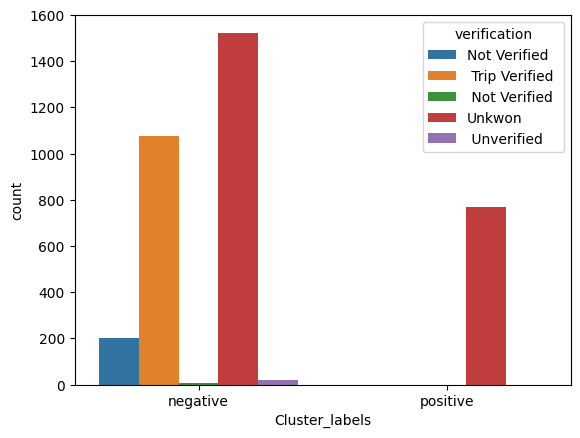

In [49]:
sns.countplot(x='Cluster_labels',data=fd,hue='verification')
plt.show()

#Above Countplot Suggests most of verified reviews are negative and most of ot verified reviews are positive And high percentage of negative reviews

#Visualizing Word cloud for Positive and negative Reviews

In [50]:
from wordcloud import WordCloud
wc=WordCloud(max_words=100)


In [51]:
top_words=wc.generate(fd[fd['Cluster_labels']=='negative']['texts'].str.cat(sep=' '))

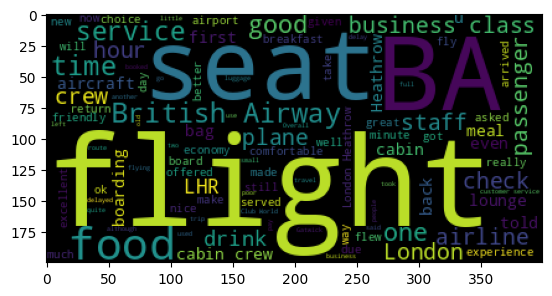

In [52]:
plt.imshow(top_words)

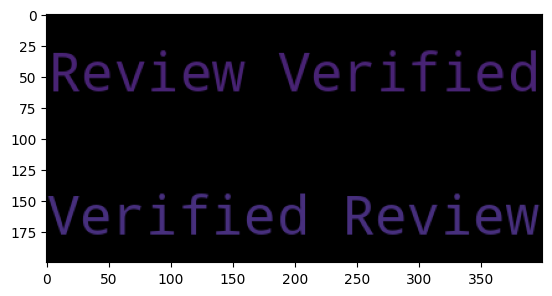

In [53]:
top_words=wc.generate(fd[fd['Cluster_labels']=='positive']['texts'].str.cat(sep=' '))
plt.imshow(top_words)

In [54]:
fd.to_csv('Verified_Outcomes.csv')